# Meep 计算光子晶体能带 (一) 简单周期结构计算
日期：2023-04-22

## 说明

回归科研以后，一些爱好需要重新拾取起来了。最近学会了用COMSOL计算光子晶体能带，现在尝试来用Meep计算光子晶体能带，希望可以以后有机会作为主力的程序来使用。

我主要参考的是官方文档：https://mpb.readthedocs.io/en/latest/Python_Tutorial/

## 简单二维光子晶体能带例子

### 能带计算

书籍[Photonic Crystals: Molding the Flow of Light second edition](http://ab-initio.mit.edu/book/) 第五章的结果。

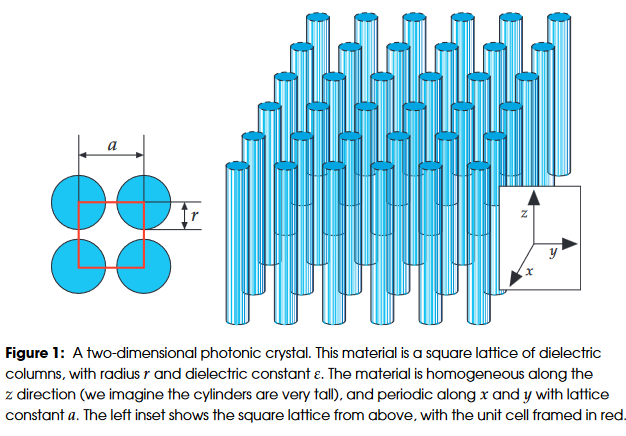

In [28]:
import math
import meep as mp
from meep import mpb

num_bands = 8

# 定义好扫描的k波矢
k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(0.5),       # X
            mp.Vector3(0.5, 0.5),  # M
            mp.Vector3()]          # Gamma

# 对k波矢进行插值
k_points = mp.interpolate(20, k_points)

# 基本结构和材料性质
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=8.9))]

# 基本二维cell
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))

resolution = 32

# mode solver设置
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

# 计算te模式
print("Square lattice of rods: TE bands")
ms.run_te()

Square lattice of rods: TE bands
Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
64 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.11904761904761904, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.166666

按照官方文档说法，要查看得到的本振频率，需要从输出的类似的log文件中提取，比如：
```bash
tefreqs:, 13, 0.3, 0.3, 0, 0.424264, 0.372604, 0.540287, 0.644083, 0.81406, 0.828135, 0.890673, 1.01328, 1.1124
```
我们需要手动将这些信息提取出来，在Linux里面主要通过正则表达式提取，这种方式感觉太不优雅了，官方文章还有例子[MPBData](https://mpb.readthedocs.io/en/latest/Python_Data_Analysis_Tutorial/)：
```python
tm_freqs = ms.all_freqs
```
可以在我们的结果中进行提取

In [46]:
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
import numpy as np
print(np.shape(te_freqs))

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: te.
Initializing fields to random numbers...
64 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.11904761904761904, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.16666666666666666, 0.0, 0.0>
  Vector3<0.19047619047619047, 

所以可以直接从计算的modesoler中得到所需的结果，如果我们再计算一下tm呢？

In [47]:
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
print(np.shape(tm_freqs))

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
64 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.11904761904761904, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.16666666666666666, 0.0, 0.0>
  Vector3<0.19047619047619047, 

从结果看，是直接覆盖的，因此我们需要跑两次，每次都单独存一下，现在来将能带画出来

[Text(0.0, 0, 'Γ'), Text(21.0, 0, 'X'), Text(42.0, 0, 'M'), Text(63.0, 0, 'Γ')]

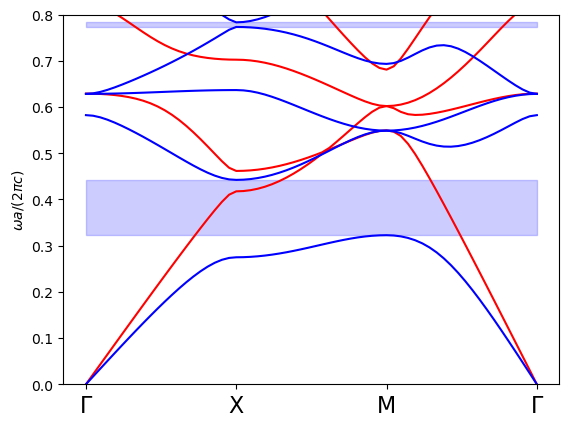

In [50]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(te_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(tm_freqs))

for l in range(num_bands):
    plt.plot(te_freqs[:,l],'r-')
    plt.plot(tm_freqs[:,l],'b-')
plt.ylim([0,0.8])
plt.ylabel('$\omega a/(2\pi c)$')

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
        

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)

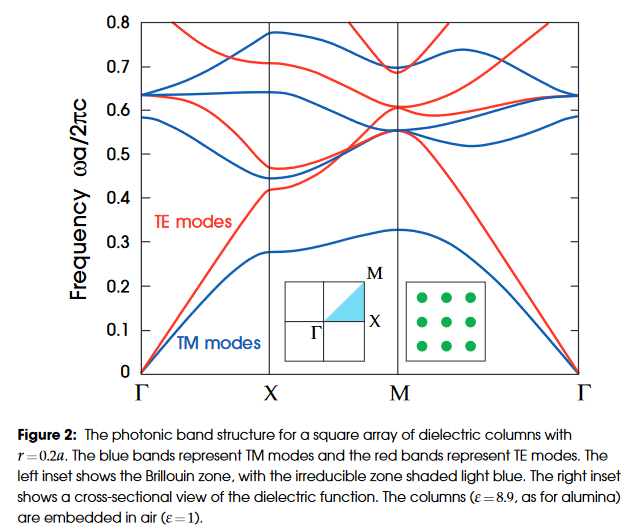

可以看到与书籍的结果是一样的。并且可以比较方便的导出Band Gap，还是比较方便的。

### 电场、磁场导出

以上是能带计算的例子，我们也可以导出相应的电场分布，观察tm模式的Ez，

In [63]:
efields = []
def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1/2, 0,0), mpb.fix_efield_phase,
          get_efields))

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
64 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.11904761904761904, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.16666666666666666, 0.0, 0.0>
  Vector3<0.19047619047619047, 

epsilon: 1-8.9, mean 1.99274, harm. mean 1.13848, 14.5508% > 1, 12.5663% "fill"
real part range: 1 .. 8.9
real part range: -0.000669461 .. 0.000669461
imag part range: -0.987259 .. 0.987259
real part range: -1.1786 .. 1.1786
imag part range: -0.000236176 .. 0.000236176
real part range: -0.000177279 .. 0.000177279
imag part range: -1.39499 .. 1.39499
real part range: -1.37383 .. 1.37383
imag part range: -0.000149481 .. 0.000149481
real part range: -0.000187996 .. 0.000187996
imag part range: -1.79927 .. 1.79927
real part range: -0.000237724 .. 0.000237724
imag part range: -1.36192 .. 1.36192
real part range: -0.00044431 .. 0.00044431
imag part range: -1.62651 .. 1.62651
real part range: -0.00190285 .. 0.00190285
imag part range: -1.85108 .. 1.85108


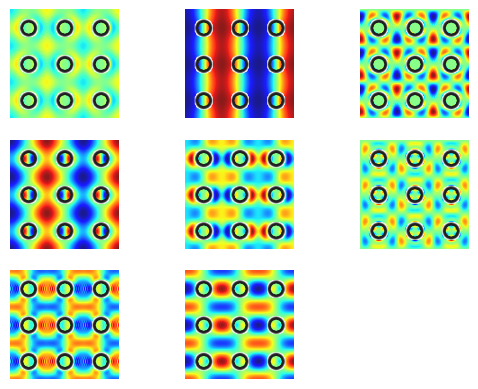

In [65]:
# Create an MPBData instance to transform the efields
eps = ms.get_epsilon() # 得到折射率分布
md = mpb.MPBData(rectify=True, resolution=32, periods=3)
converted_eps = md.convert(eps)


converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))


for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='jet', alpha=0.9)
    plt.axis('off')

plt.show()

按道理应该没有Ex,Ey分量，可以进行测试,绘制一下Ex

epsilon: 1-8.9, mean 1.99274, harm. mean 1.13848, 14.5508% > 1, 12.5663% "fill"
real part range: 1 .. 8.9
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0
real part range: 0 .. 0
imag part range: 0 .. 0


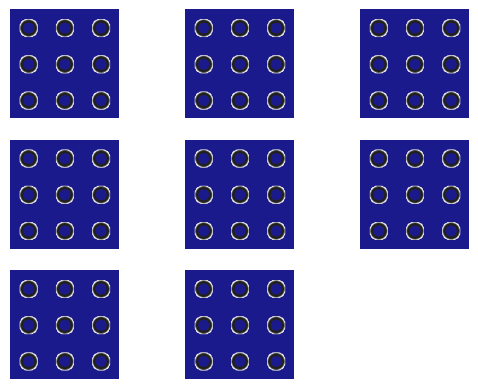

In [66]:
# Create an MPBData instance to transform the efields
eps = ms.get_epsilon() # 得到折射率分布
md = mpb.MPBData(rectify=True, resolution=32, periods=3)
converted_eps = md.convert(eps)


converted = []
for f in efields:
    # Get just the  component of the efields
    f = f[..., 0, 0]
    converted.append(md.convert(f))


for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='jet', alpha=0.9)
    plt.axis('off')

plt.show()

结果与预期一致，都是0，确实是TM模式.